In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'emg-4:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F88836%2F206004%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240424%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240424T193928Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D226c602be40c914bdd0df61ce20bc48f7d25d65707c5ea93fc98f4a91c1e11f316774dbbe3290dd33594834cf7f9df2e94d3ec0c2a8be963eb3ed65f3d26e4c3c43eeced9cd1029813fa295ba3337ce80e38441bacb2d392ca4ff46ef85cdcc33df63a667edf368f4c1a9a37c40fd2f079c5e95ad483758d1e8015b39074f46dba302c9956ac6ee6f6bfd8fad71110c84df5e882822c975c714a2ecf68249bc73b8032a6402c0e19f5a525cd8f56d2b3032f7cedd06a475dc5650355f2530eb06e8ed3810dbf9d8c2af4ea96e13c2537939a6c11af2eaf15003dbd5154996eafc7d794308ba5fe0e6709fd4f0a4934f5a8e889ba005972137ed29fdefd68da78'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/emg-4/1.csv
/kaggle/input/emg-4/3.csv
/kaggle/input/emg-4/2.csv
/kaggle/input/emg-4/0.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report as cr

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV



In [ ]:
ges0 = pd.read_csv("/kaggle/input/emg-4/0.csv",header = None)

In [ ]:
ges1 = pd.read_csv("/kaggle/input/emg-4/1.csv",header = None)

In [ ]:
ges2 = pd.read_csv("/kaggle/input/emg-4/2.csv",header = None)

In [ ]:
ges3 = pd.read_csv("/kaggle/input/emg-4/3.csv",header = None)

In [ ]:
ges0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2910 entries, 0 to 2909
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2910 non-null   float64
 1   1       2910 non-null   float64
 2   2       2910 non-null   float64
 3   3       2910 non-null   float64
 4   4       2910 non-null   float64
 5   5       2910 non-null   float64
 6   6       2910 non-null   float64
 7   7       2910 non-null   float64
 8   8       2910 non-null   float64
 9   9       2910 non-null   float64
 10  10      2910 non-null   float64
 11  11      2910 non-null   float64
 12  12      2910 non-null   float64
 13  13      2910 non-null   float64
 14  14      2910 non-null   float64
 15  15      2910 non-null   float64
 16  16      2910 non-null   float64
 17  17      2910 non-null   float64
 18  18      2910 non-null   float64
 19  19      2910 non-null   float64
 20  20      2910 non-null   float64
 21  21      2910 non-null   float64
 22  

In [ ]:
total = pd.concat([ges0,ges1,ges2,ges3])
total.describe()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
count,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,...,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000
mean,-0.520380,-0.726837,-0.739082,-0.729748,-0.159103,-0.554890,-1.272649,-0.661843,-0.665953,-0.654222,...,-0.932694,-0.836958,-0.740623,-0.768710,-0.705343,-0.146686,-0.374807,-1.449306,-0.609094,1.503254
std,18.566709,11.766878,4.989944,7.441675,17.850402,25.809528,25.089972,15.408896,18.123854,11.841260,...,15.158993,18.204465,12.005206,4.969758,7.384410,17.841479,25.551082,25.259736,15.530091,1.117541
min,-116.000000,-104.000000,-33.000000,-75.000000,-121.000000,-122.000000,-128.000000,-128.000000,-110.000000,-128.000000,...,-128.000000,-116.000000,-128.000000,-46.000000,-74.000000,-103.000000,-128.000000,-128.000000,-124.000000,0.000000
25%,-9.000000,-4.000000,-3.000000,-4.000000,-10.000000,-15.000000,-6.000000,-8.000000,-9.000000,-4.000000,...,-8.000000,-9.000000,-4.000000,-3.000000,-4.000000,-10.000000,-14.000000,-6.000000,-8.000000,1.000000
50%,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,2.000000
75%,7.000000,3.000000,2.000000,3.000000,10.000000,13.000000,4.000000,6.000000,6.000000,3.000000,...,6.000000,6.000000,3.000000,2.000000,3.000000,10.000000,13.000000,3.000000,6.000000,3.000000
max,111.000000,90.000000,34.000000,55.000000,92.000000,127.000000,127.000000,126.000000,127.000000,106.000000,...,114.000000,127.000000,105.000000,29.000000,51.000000,110.000000,127.000000,127.000000,127.000000,3.000000


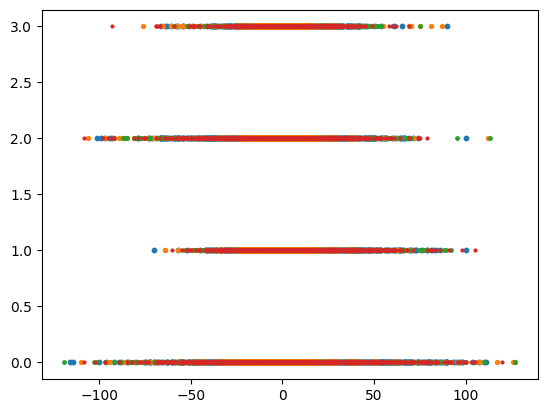

In [ ]:
plt.scatter(total[0],total[64],s = 10)
plt.scatter(total[8],total[64],s = 8)
plt.scatter(total[16],total[64],s=6)
plt.scatter(total[24],total[64],s=4)


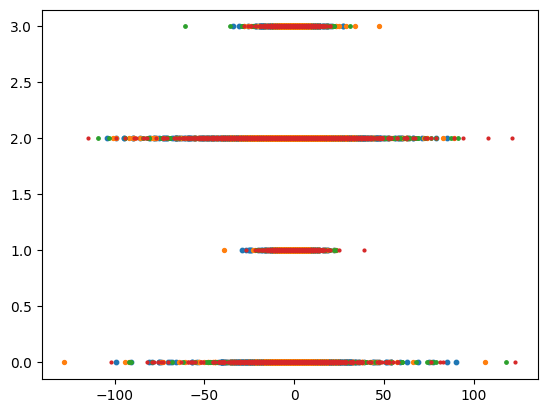

In [ ]:
plt.scatter(total[1],total[64],s = 10)
plt.scatter(total[9],total[64],s = 8)
plt.scatter(total[17],total[64],s=6)
plt.scatter(total[25],total[64],s=4)

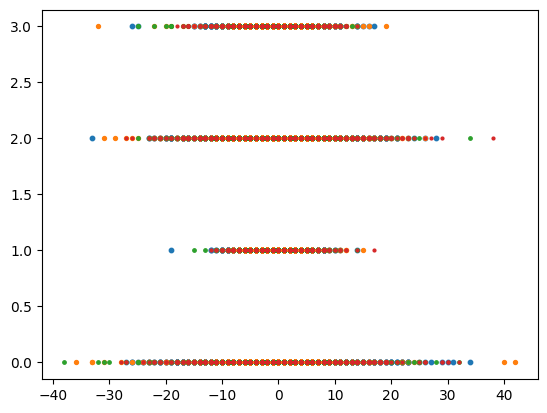

In [ ]:
plt.scatter(total[2],total[64],s = 10)
plt.scatter(total[10],total[64],s = 8)
plt.scatter(total[18],total[64],s=6)
plt.scatter(total[26],total[64],s=4)

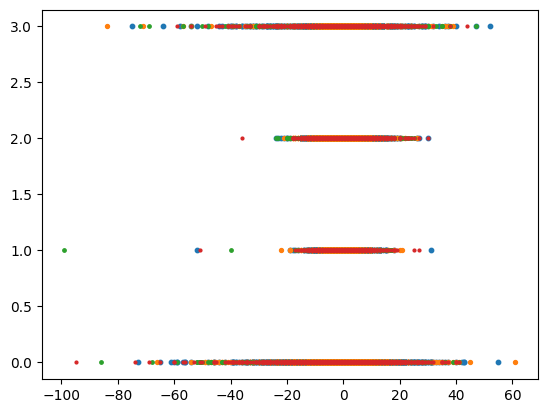

In [ ]:
plt.scatter(total[3],total[64],s = 10)
plt.scatter(total[11],total[64],s = 8)
plt.scatter(total[19],total[64],s=6)
plt.scatter(total[27],total[64],s=4)

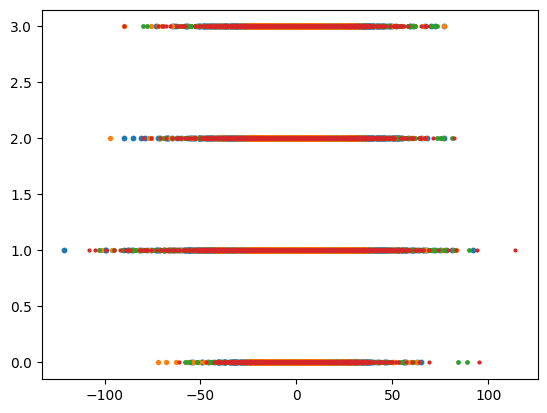

In [ ]:
plt.scatter(total[4],total[64],s = 10)
plt.scatter(total[12],total[64],s = 8)
plt.scatter(total[20],total[64],s=6)
plt.scatter(total[28],total[64],s=4)

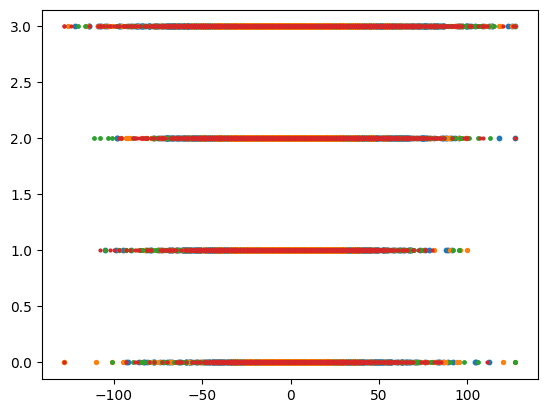

In [ ]:
plt.scatter(total[5],total[64],s = 10)
plt.scatter(total[13],total[64],s = 8)
plt.scatter(total[21],total[64],s=6)
plt.scatter(total[29],total[64],s=4)

In [ ]:
total.corr()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,1.000000,0.236175,0.055443,0.007532,-0.022459,0.012504,0.131200,0.230922,-0.357610,-0.072079,...,0.026089,0.004530,0.007598,0.000008,-0.009172,-0.016544,-0.010714,-0.019816,-0.005071,-0.005067
1,0.236175,1.000000,0.335145,0.087050,-0.065602,-0.018666,0.066148,0.085071,-0.054460,-0.276969,...,0.007169,-0.010128,-0.004745,0.007680,-0.006762,-0.010608,-0.006335,-0.017750,-0.004669,-0.002406
2,0.055443,0.335145,1.000000,0.510603,-0.049996,0.025723,0.094532,0.111974,-0.029452,-0.129410,...,-0.003032,0.010135,-0.025798,-0.013198,-0.014346,0.018602,0.006114,-0.007898,-0.007970,-0.001895
3,0.007532,0.087050,0.510603,1.000000,0.050598,0.062652,0.034946,0.040564,-0.015133,-0.053802,...,-0.013151,0.004011,0.002588,-0.019178,-0.017830,0.017195,-0.001214,0.000571,-0.003883,-0.006233
4,-0.022459,-0.065602,-0.049996,0.050598,1.000000,0.509146,0.090774,0.033018,-0.003021,0.004497,...,0.012888,-0.022000,0.003458,-0.004212,-0.001602,0.002776,-0.011707,-0.009237,-0.018266,-0.003997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,-0.016544,-0.010608,0.018602,0.017195,0.002776,-0.015946,-0.008885,-0.004736,0.004999,-0.009214,...,0.011465,-0.005862,-0.059276,-0.055527,0.047117,1.000000,0.510996,0.109822,0.033822,0.001852
61,-0.010714,-0.006335,0.006114,-0.001214,-0.011707,-0.019112,0.005507,-0.000081,0.006306,0.002171,...,0.008811,0.030463,-0.012113,0.009803,0.032700,0.510996,1.000000,0.242202,0.136009,-0.000523
62,-0.019816,-0.017750,-0.007898,0.000571,-0.009237,-0.033776,-0.021347,-0.015342,0.015947,-0.008663,...,-0.160650,0.112836,0.066652,0.084170,0.037117,0.109822,0.242202,1.000000,0.463950,0.038721
63,-0.005071,-0.004669,-0.007970,-0.003883,-0.018266,-0.031778,-0.021536,-0.033932,0.012057,-0.005195,...,-0.296766,0.226695,0.098331,0.112107,0.062475,0.033822,0.136009,0.463950,1.000000,0.016770


In [ ]:
for i in total.corr()[64]:
    print(i)

-0.005067242501796991
-0.0024055682535800093
-0.0018952964547252118
-0.0062328036749548735
-0.003996553161175709
-0.018645711691477215
0.029230311304784116
0.0018532540439952546
-0.00774686821257312
-0.0019488357139403095
-0.0030098436268097095
0.0012423428431316797
-2.2093454245902584e-05
-0.009945112978676679
0.033009324111650494
-0.0055478791500863794
0.007163030713600704
-0.004477282374904426
-0.009486447272909322
-0.0051700625822640196
0.0035197132002015544
-0.003860355880632559
0.035932867425697165
0.0026633736999142495
-0.002417327804221003
0.004041560202104753
-0.010892817536740014
-0.011921847857206099
-0.014735631916789456
-0.018053737524746837
0.03415031107425219
-0.015159319207315329
0.01083728645308859
0.003763236756702703
0.004728720014286447
0.00558948645844263
-0.0007729667841220091
0.005750413882024265
0.04250219315358595
0.002849106680672561
0.012554258201713235
0.0013525862694994475
-0.0020115444106641794
-0.0004320752002495681
-0.006797692581201809
-0.00387388742916

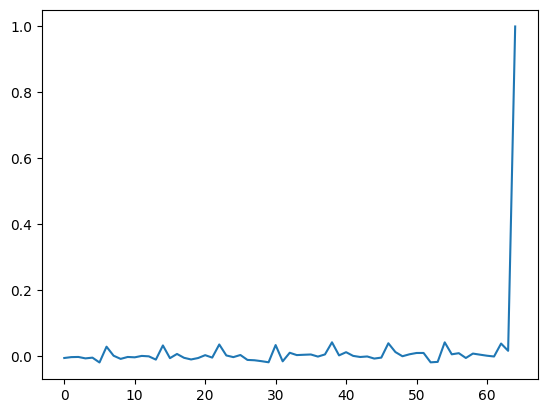

In [ ]:
plt.plot(total.corr()[64])

In [ ]:
target = [64]
y = total[target]

In [ ]:
features =[]
for i in range(64):
    features.append(i)

In [ ]:
X = total[features]

In [ ]:
X_t, X_test , y_t, y_test = train_test_split(X,y, train_size=0.8, random_state=1)

In [ ]:
X_train, X_val , y_train , y_val = train_test_split(X_t,y_t, train_size = 0.8, random_state=1)

SCALING

In [ ]:
scaled_x = StandardScaler().fit_transform(X_train,y_train)

In [ ]:
scaled_x_val = StandardScaler().fit_transform(X_val,y_val)

In [ ]:
norm_x = normalize(X_train)

In [ ]:
norm_x_val = normalize(X_val)

In [ ]:
norm_x_test = normalize(X_test)

In [ ]:
norm_xt = normalize(X_t)

#  ****KNN algo****

In [ ]:
model_try = knn(n_jobs = -1)

In [ ]:
model_try.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_jobs=-1)

In [ ]:
model_try.score(X_val,y_val)

0.6827180310326377

In [ ]:
print(cr(y_train,y_pred_kn))

              precision    recall  f1-score   support

           0       0.99      0.92      0.96      1848
           1       0.61      0.95      0.74      1853
           2       0.93      0.34      0.49      1912
           3       0.72      0.85      0.78      1860

    accuracy                           0.76      7473
   macro avg       0.81      0.76      0.74      7473
weighted avg       0.81      0.76      0.74      7473



In [ ]:
y_pred_scaled = model_try.predict(scaled_x)

In [ ]:
y_val_scaled = model_try.predict(scaled_x_val)

In [ ]:
model_try.score(scaled_x,y_train)

0.2725812926535528

scaled

In [ ]:
md_scaled = knn(n_jobs = -1)

In [ ]:
md_scaled.fit(scaled_x,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_jobs=-1)

In [ ]:
md_scaled.score(scaled_x,y_train)

0.7553860564699585

In [ ]:
md_scaled.score(scaled_x_val,y_val)

0.6682718031032637

normalized

In [ ]:
md_norm = knn(n_jobs = -1)

In [ ]:
md_norm.fit(norm_x,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_jobs=-1)

In [ ]:
md_norm.score(norm_x,y_train)

0.8228288505285695

In [ ]:
md_norm.score(norm_x_val,y_val)

0.7581594435527019

In [ ]:
md_norm.score(norm_x_test,y_test)

0.7701198630136986

# ****Hyperparameter optimisation****

In [ ]:
param_grid_knn = [{
    'n_neighbors':[3,4,5,6,7,8,9,10],
    'weights':['uniform','distance'],
    'p' : [1,2,3]
                  }]

In [ ]:
hpk = GridSearchCV(knn(),param_grid_knn,n_jobs=-1)

In [ ]:
hpk.fit(norm_x,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3], 'weights': ['uniform', 'distance']}])

In [ ]:
print(hpk.best_params_)

{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


In [ ]:
print(hpk.best_score_)

0.7635479263766325


In [ ]:
knn_best= knn(n_neighbors=5,weights='distance',p=1)

In [ ]:
knn_best.fit(norm_xt,y_t)

/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(p=1, weights='distance')

In [ ]:
knn_best.score(norm_x_val,y_val)

1.0

In [ ]:
knn_best.score(norm_x_test,y_test)

0.7735445205479452

# ****Decision tree****

In [ ]:
dt_raw = DecisionTreeClassifier(random_state = 26)

In [ ]:
dt_raw.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
dt_raw.score(X_train,y_train)

1.0

In [ ]:
dt_raw.score(X_val,y_val)

0.7710005350454788

scaled

In [ ]:
dt_scale = DecisionTreeClassifier(random_state = 26)

In [ ]:
dt_scale.fit(scaled_x,y_train)

DecisionTreeClassifier()

In [ ]:
dt_scale.score(scaled_x,y_train)

1.0

In [ ]:
dt_scale.score(scaled_x_val,y_val)

0.7586944890315677

normalized

In [ ]:
dt_norm = DecisionTreeClassifier(random_state =26)
dt_norm.fit(norm_x,y_train)

DecisionTreeClassifier(random_state=26)

In [ ]:
dt_norm.score(norm_x,y_train)

1.0

In [ ]:
dt_norm.score(norm_x_val,y_val)

0.7806313536650615

# ****Hyperparamter optimisation****

In [ ]:
param_grid_dt = [{

}]

# ****Random forest****

In [ ]:
rf_raw = RandomForestClassifier(random_state = 26)

In [ ]:
rf_raw.fit(X_train,y_train)

/tmp/ipykernel_237/3095702955.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_raw.fit(X_train,y_train)


RandomForestClassifier()

In [ ]:
rf_raw.score(X_train,y_train)

1.0

In [ ]:
rf_raw.score(X_val,y_val)

0.9159978598180846

scaled

In [ ]:
rf_scale = RandomForestClassifier(random_state = 26)

In [ ]:
rf_scale.fit(scaled_x,y_train)

/tmp/ipykernel_237/1401457911.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_scale.fit(scaled_x,y_train)


RandomForestClassifier()

In [ ]:
rf_scale.score(scaled_x,y_train)

1.0

In [ ]:
rf_scale.score(scaled_x_val,y_val)

0.9058319957196361

normalized

In [ ]:
rf_norm = RandomForestClassifier(random_state = 26)
rf_norm.fit(norm_x,y_train)

/tmp/ipykernel_33/3280871127.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_norm.fit(norm_x,y_train)


RandomForestClassifier(random_state=26)

In [ ]:
rf_norm.score(norm_x,y_train)

1.0

In [ ]:
rf_norm.score(norm_x_val,y_val)

0.9304440877474586

In [ ]:
rf_norm.score(norm_x_test,y_test)

0.9353595890410958

In [ ]:
rf_norm.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 26,
 'verbose': 0,
 'warm_start': False}

# ****Hyperparameter optimization****

Performing cross-validation for hyperparameter optimization

In [ ]:
params_grid_rf = [{
    'n_estimators' : [50,100,150,200],
    'criterion' : ['gini','entropy','log_loss'],
    'min_samples_split' : [2,4,6,8],
    'max_features': [None,'sqrt']

}]

In [ ]:
hprf = GridSearchCV(RandomForestClassifier(),params_grid_rf,n_jobs = -1)

In [ ]:
result = hprf.fit(X_train,ravel(y_train))

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

In [ ]:
hprf.best_score_

0.9210483852914445

In [ ]:
hprf.best_params_

{'criterion': 'entropy',
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 200}

In [ ]:
params_grid_rf2 = [{
    'criterion' : ['entropy'],
    'min_impurity_decrease' : [0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.00085,0.00086,0.0011]
}]

In [ ]:
hprf2 = GridSearchCV(RandomForestClassifier(),params_grid_rf2,n_jobs = -1)

In [ ]:
result = hprf2.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

In [ ]:
hprf2.best_params_

{'criterion': 'entropy', 'min_impurity_decrease': 0.0003}

In [ ]:
hprf2.cv_results_['mean_test_score']

NameError: name 'hprfarrow2' is not defined

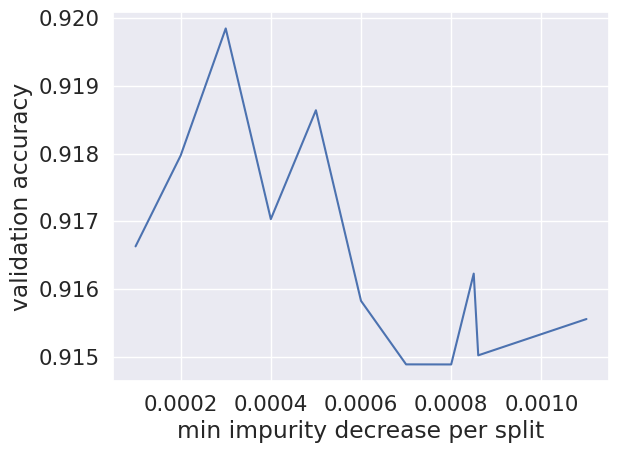

In [ ]:
plt.plot(impurities,hprf2.cv_results_['mean_test_score'])
plt.xlabel("min impurity decrease per split")
plt.ylabel("validation accuracy");

In [ ]:
hprf2.cv_results_

{'mean_fit_time': array([5.74082131, 5.77694345, 6.05210619, 5.90403328, 5.76977758,
        5.74703078, 5.82774363, 5.95538492, 5.64160628, 5.6307282 ,
        5.15538073]),
 'std_fit_time': array([0.03467611, 0.03520231, 0.22337553, 0.21366374, 0.05836783,
        0.06430769, 0.14319052, 0.11177956, 0.04063565, 0.05068101,
        0.54170694]),
 'mean_score_time': array([0.06514292, 0.06510167, 0.06510887, 0.06437941, 0.06356258,
        0.06163549, 0.0668313 , 0.06334276, 0.05963616, 0.05896497,
        0.05399995]),
 'std_score_time': array([0.00196252, 0.0026903 , 0.00200867, 0.00142257, 0.00140857,
        0.00094454, 0.01344127, 0.00463504, 0.00073763, 0.00083626,
        0.01588481]),
 'param_criterion': masked_array(data=['entropy', 'entropy', 'entropy', 'entropy', 'entropy',
                    'entropy', 'entropy', 'entropy', 'entropy', 'entropy',
                    'entropy'],
              mask=[False, False, False, False, False, False, False, False,
                    F

In [ ]:
rf_best = RandomForestClassifier(criterion='entropy',n_estimators =200,n_jobs =-1,random_state=26)

In [ ]:
rf_best.fit(norm_x,y_train)

/tmp/ipykernel_33/2316662424.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_best.fit(norm_x,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=200, n_jobs=-1)

In [ ]:
rf_best.score(norm_x_val,y_val)

0.9357945425361156

In [ ]:
rf_best.score(X_val,y_val)

0.24933119315141786

/tmp/ipykernel_33/3729893720.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  tp.fit(norm_x,y_train)
/tmp/ipykernel_33/3729893720.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  tp.fit(norm_x,y_train)
/tmp/ipykernel_33/3729893720.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  tp.fit(norm_x,y_train)
/tmp/ipykernel_33/3729893720.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  tp.fit(norm_x,y_train)
/tmp/ipykernel_33/3729893720.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

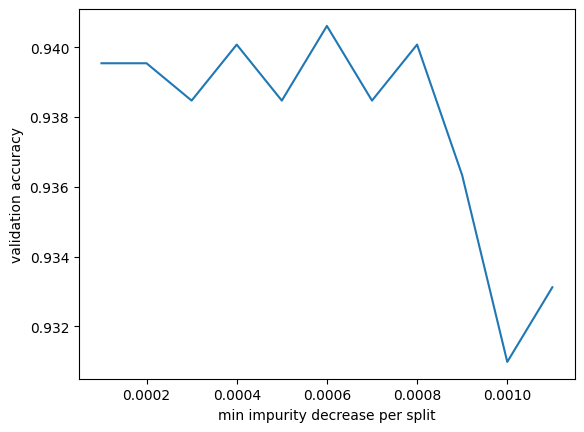

In [ ]:
impurities = [0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001,0.0011]
scores=[]
for i in impurities:
    tp = RandomForestClassifier(criterion='entropy',n_estimators =300,n_jobs =-1,random_state=26,min_impurity_decrease = i)
    tp.fit(norm_x,y_train)
    scores.append(tp.score(norm_x_val,y_val))
plt.plot(impurities, scores)
plt.xlabel("min impurity decrease per split")
plt.ylabel("validation accuracy");

In [ ]:
impurities = [0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.00085,0.00086,0.0011]
# scores=[]
# for i in impurities:
#     tp = RandomForestClassifier(criterion='entropy',n_estimators =300,n_jobs =-1,random_state=26,min_impurity_decrease = i)
#     tp.fit(norm_x,y_train)
#     scores.append(tp.score(norm_x_val,y_val))
# plt.plot(impurities, scores)
# plt.xlabel("min impurity decrease per split")
# plt.ylabel("validation accuracy");

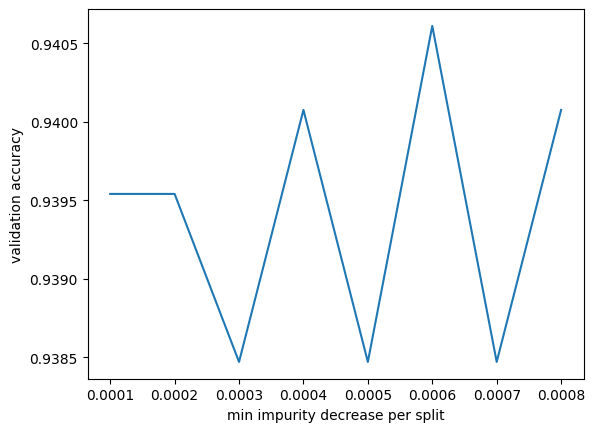

In [ ]:
plt.plot(impurities, scores)
plt.xlabel("min impurity decrease per split")
plt.ylabel("validation accuracy");

In [ ]:
bkc = RandomForestClassifier(criterion='entropy',n_estimators =200,n_jobs =-1,random_state=26,min_impurity_decrease = 0.0003)

In [ ]:
bkc.fit(norm_xt,y_t)

/tmp/ipykernel_33/2480782262.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  bkc.fit(norm_xt,y_t)


RandomForestClassifier(criterion='entropy', min_impurity_decrease=0.0003,
                       n_estimators=200, n_jobs=-1, random_state=26)

In [ ]:
bkc.score(norm_x_test,y_test)

0.9434931506849316

In [ ]:
y_pred_test = bkc.predict(norm_x_test)

In [ ]:
print(cm(y_test,yrfpred_test))

[[605   0   7   2]
 [  0 531  17  36]
 [ 10   6 522  20]
 [ 28  22  20 510]]


In [ ]:
print(cr(y_test,yrfpred_test))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       614
           1       0.95      0.91      0.93       584
           2       0.92      0.94      0.93       558
           3       0.90      0.88      0.89       580

    accuracy                           0.93      2336
   macro avg       0.93      0.93      0.93      2336
weighted avg       0.93      0.93      0.93      2336



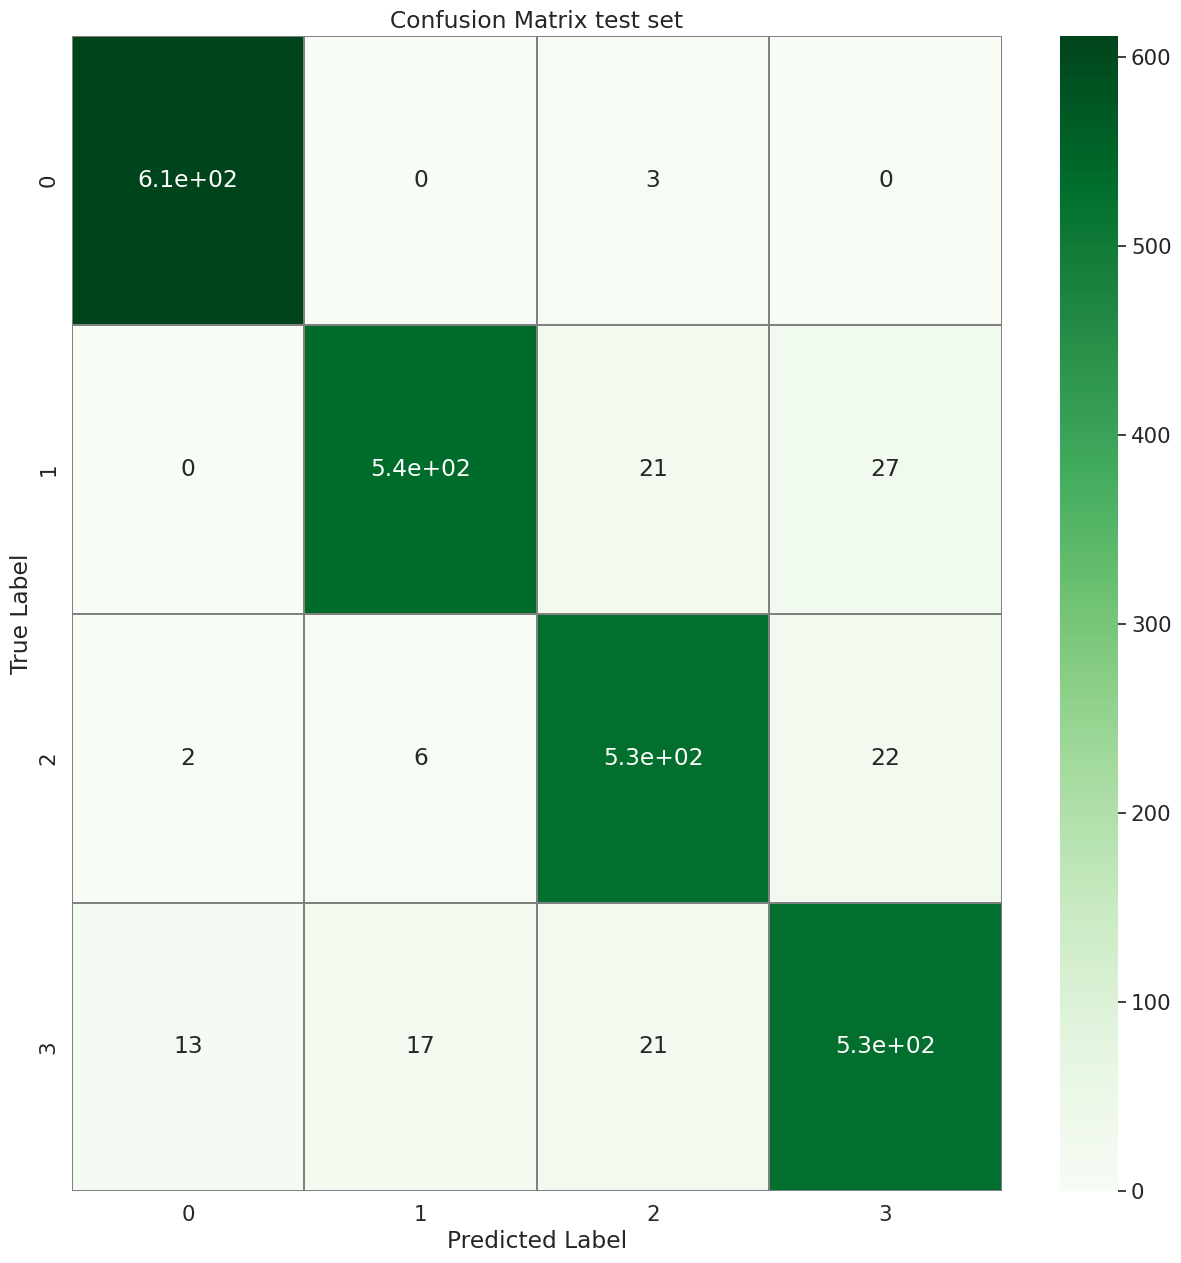

In [ ]:
f,ax = plt.subplots(figsize=(15, 15))
sns.set(font_scale=1.4)
sns.heatmap(cm(y_test,y_pred_test), annot=True, linewidths=0.01,cmap="Greens",linecolor="gray",ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix test set")
plt.show()

In [ ]:
rf_tot = RandomForestClassifier(criterion='entropy',n_estimators =300,n_jobs =-1,random_state=26)

In [ ]:
rf_tot.fit(norm_xt,y_t)

/tmp/ipykernel_33/194016426.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_tot.fit(norm_xt,y_t)


RandomForestClassifier(criterion='entropy', n_estimators=300, n_jobs=-1,
                       random_state=26)

In [ ]:
yrfpred_test = rf_tot.predict(norm_x_test)

In [ ]:
rf_tot.score(norm_x_test,y_test)

0.9452054794520548

In [ ]:
print(cm(y_test,yrfpred_test))

[[605   0   6   3]
 [  0 536  13  35]
 [  5   7 524  22]
 [ 26  21  19 514]]


In [ ]:
print(cr(y_test,yrfpred_test))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       614
           1       0.95      0.92      0.93       584
           2       0.93      0.94      0.94       558
           3       0.90      0.89      0.89       580

    accuracy                           0.93      2336
   macro avg       0.93      0.93      0.93      2336
weighted avg       0.93      0.93      0.93      2336



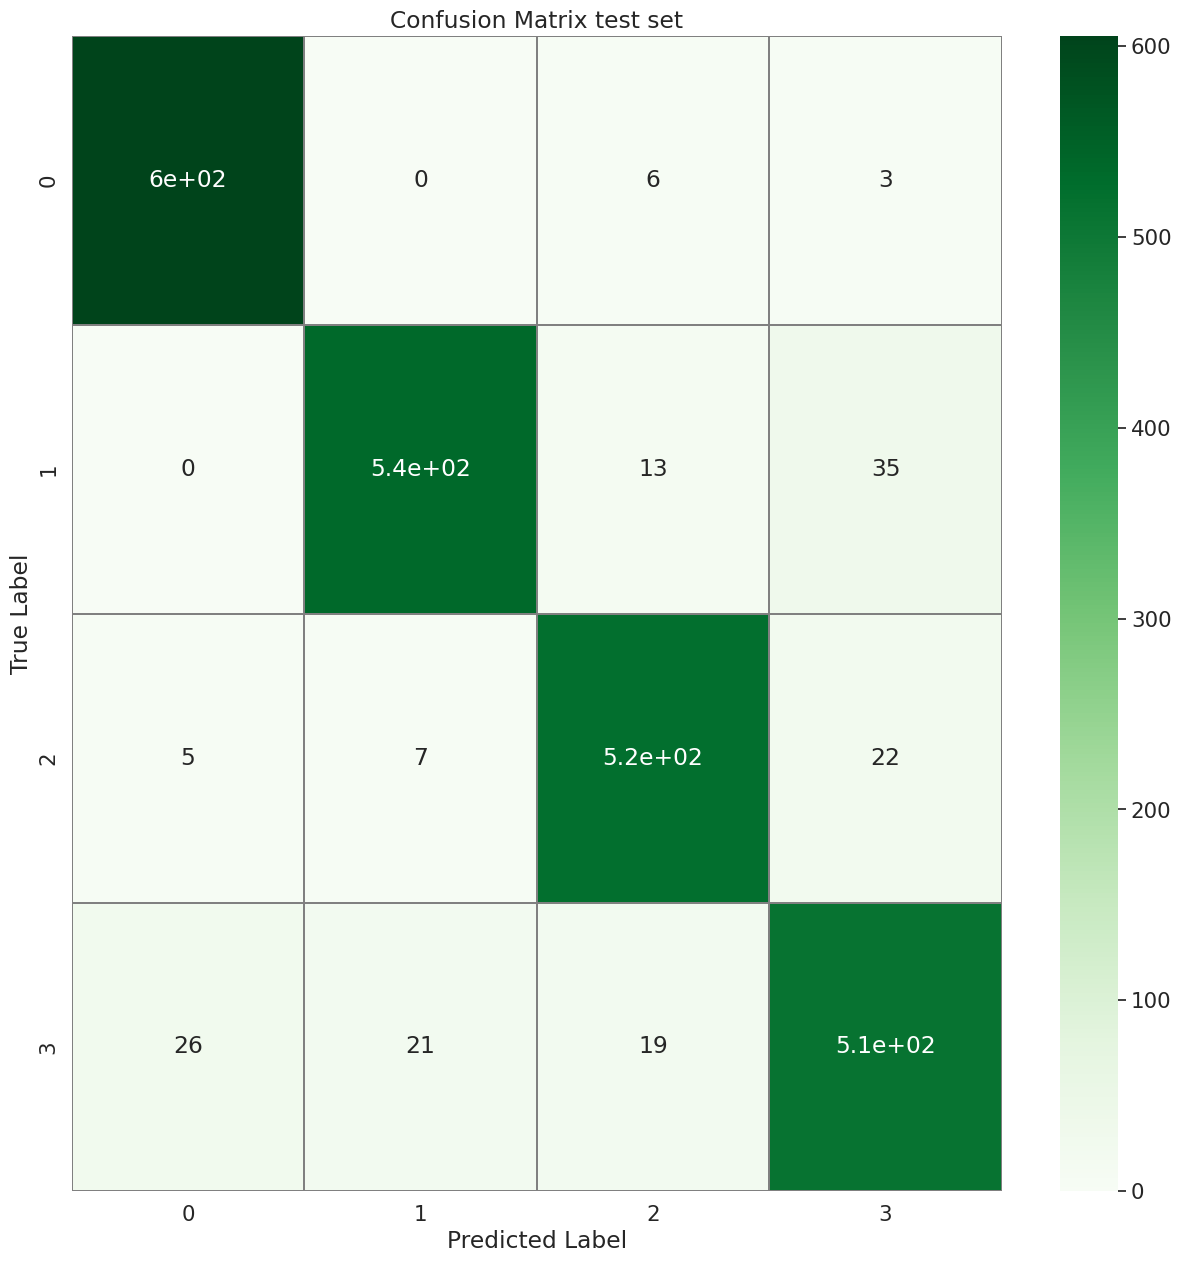

In [ ]:
f,ax = plt.subplots(figsize=(15, 15))
sns.set(font_scale=1.4)
sns.heatmap(cm(y_test,yrfpred_test), annot=True, linewidths=0.01,cmap="Greens",linecolor="gray",ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix test set")
plt.show()

In [ ]:
rf_tot_1 = RandomForestClassifier(criterion='entropy',n_estimators =300,n_jobs =-1,random_state=26,min_impurity_decrease = 0.0006)

In [ ]:
rf_tot_1.fit(norm_xt,y_t)

/tmp/ipykernel_33/1764837743.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_tot_1.fit(norm_xt,y_t)


RandomForestClassifier(criterion='entropy', min_impurity_decrease=0.0006,
                       n_estimators=300, n_jobs=-1, random_state=26)

In [ ]:
yrfpred_test = rf_tot_1.predict(norm_x_test)

In [ ]:
rf_tot_1.score(norm_x_test,y_test)

0.9456335616438356

In [ ]:
print(cm(y_test,yrfpred_test))

[[611   0   3   0]
 [  0 538  19  27]
 [  3   5 529  21]
 [ 16  15  18 531]]


In [ ]:
print(cr(y_test,yrfpred_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       614
           1       0.96      0.92      0.94       584
           2       0.93      0.95      0.94       558
           3       0.92      0.92      0.92       580

    accuracy                           0.95      2336
   macro avg       0.95      0.94      0.94      2336
weighted avg       0.95      0.95      0.95      2336



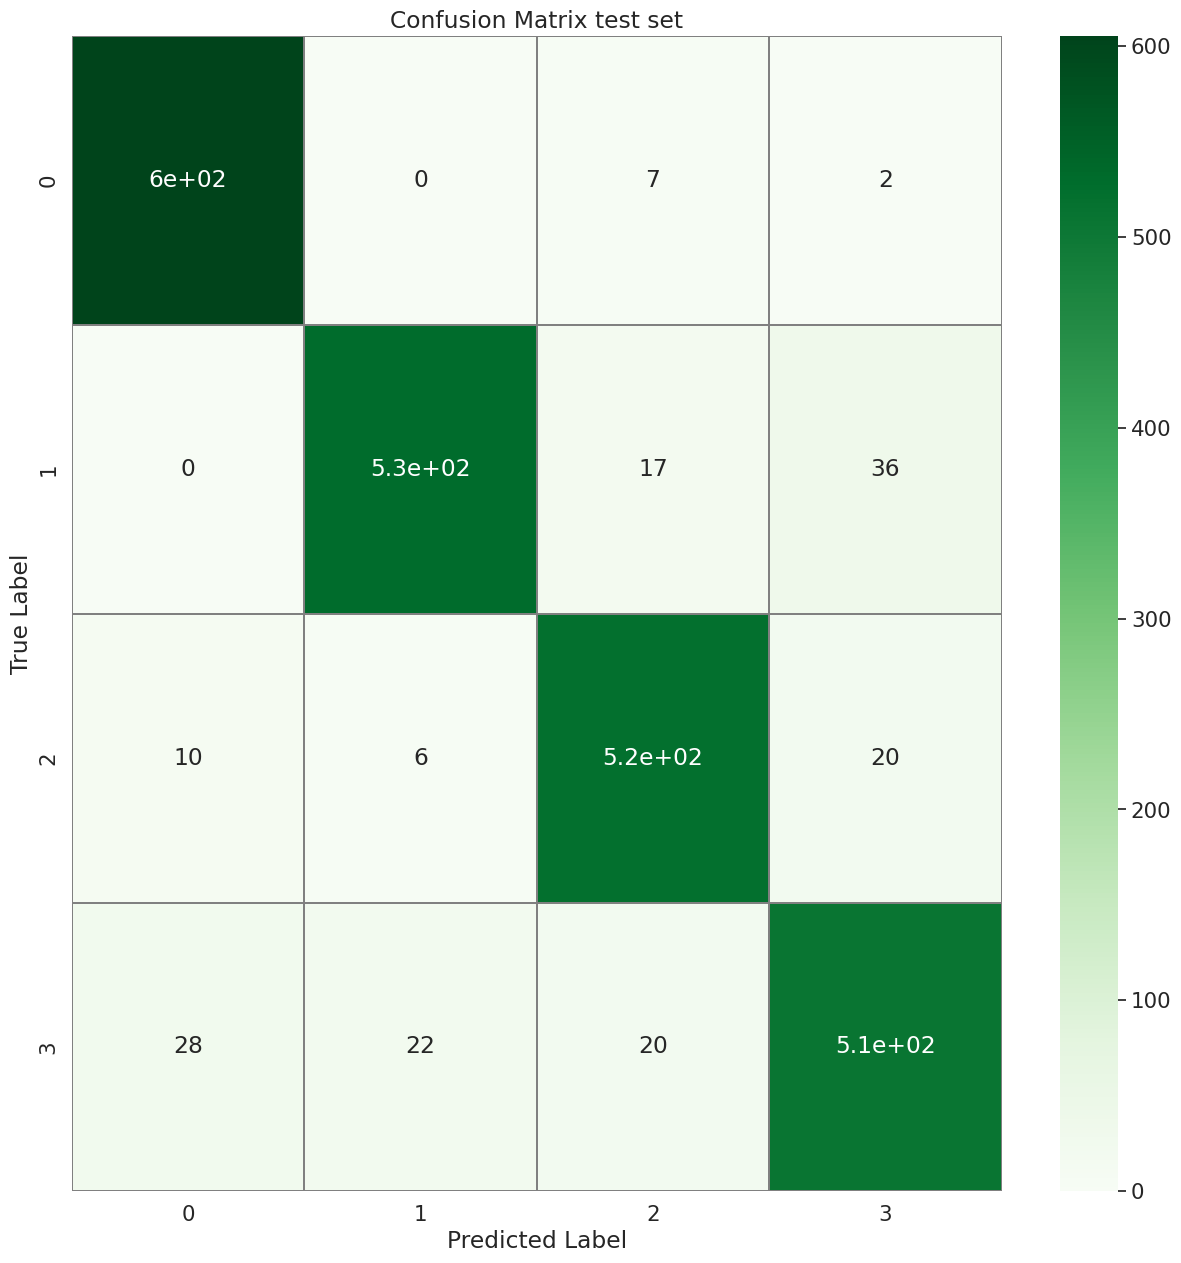

In [ ]:
f,ax = plt.subplots(figsize=(15, 15))
sns.set(font_scale=1.4)
sns.heatmap(cm(y_test,yrfpred_test), annot=True, linewidths=0.01,cmap="Greens",linecolor="gray",ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix test set")
plt.show()